# Decision Trees and Random Forests in Python



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

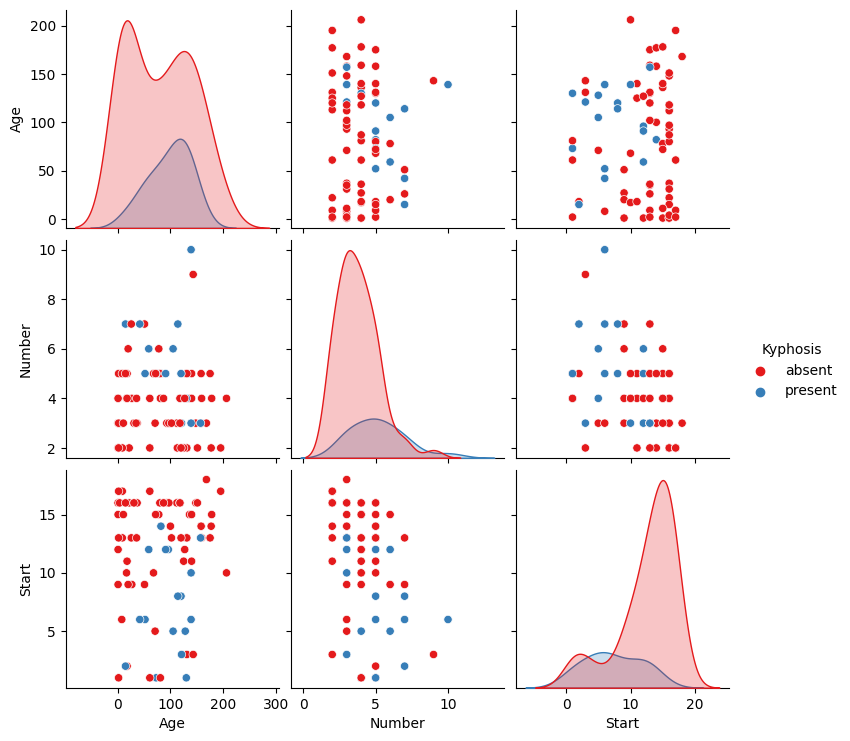

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier() #max_depth,min_samples_split

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.93      0.64      0.76        22
     present       0.20      0.67      0.31         3

    accuracy                           0.64        25
   macro avg       0.57      0.65      0.53        25
weighted avg       0.85      0.64      0.70        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[14  8]
 [ 1  2]]


In [17]:
import pickle
filename = 'DT_model.sav' # name we want to give
# logR is our mode, see above!
# file will be stored on the disk, see the working directory
pickle.dump(dtree, open(filename, 'wb'))


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

[Text(0.45454545454545453, 0.9285714285714286, 'X[2] <= 8.5\ngini = 0.375\nsamples = 56\nvalue = [42, 14]'),
 Text(0.18181818181818182, 0.7857142857142857, 'X[0] <= 8.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.09090909090909091, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.6428571428571429, 'X[1] <= 3.0\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7272727272727273, 0.7857142857142857, 'X[2] <= 14.5\ngini = 0.227\nsamples = 46\nvalue = [40, 6]'),
 Text(0.6363636363636364, 0.6428571428571429, 'X[0] <= 47.0\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(0.5454545454545454, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.7272727272727273, 0.5, 'X[0] <= 99.0\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(0.6363636363636364, 0.35714285714285715, 'gini 

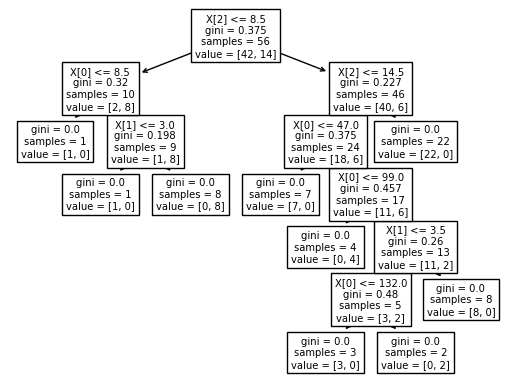

In [18]:
from sklearn import tree

tree.plot_tree(dtree)


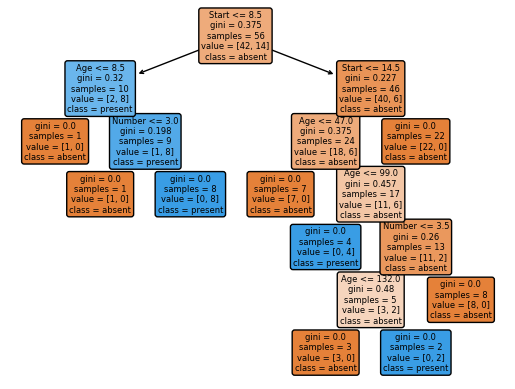

In [19]:
tree.plot_tree(dtree,
               feature_names = X.columns, 
               class_names=df['Kyphosis'].unique(),
               rounded=True, 
               filled = True);

In [20]:
loaded_model = pickle.load(open(filename, 'rb')) 

age = int(input('Enter your age:'))
number = int(input('Enter number:'))
start = int(input('Enter Start: '))

Enter your age:12
Enter number:2
Enter Start: 4


In [22]:
pre = loaded_model.predict([[age,number,start]])
pre

C:\Users\ParsArgham\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['absent'], dtype=object)

## Random Forests

Now let's compare the decision tree model to a random forest.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
rfc_pred = rfc.predict(X_test)

In [25]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 4  1]]


In [26]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.91        20
     present       1.00      0.20      0.33         5

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25



# Great Job!